## Analysis of Twitter data about Climate Change
By Liam Goldstein, using a sample dataset provided by Dr. David Silva

### 1. Import the variables and files needed for the dataset

In [1]:
import pandas as pd
import warnings

In [2]:
comm_uniq = pd.read_csv(r'ClimateChange_Apr3-Apr4_2013_fixed.csv')
comm_uniq.keys()

Index(['Unnamed: 0', 'Date', 'Title', 'Url', 'Domain', 'Language', 'Author',
       'Full Name', 'Full Text', 'Impressions', 'Original Url',
       'Thread Author', 'Thread Created Date', 'Thread Entry Type',
       'Twitter Followers', 'Twitter Following', 'Twitter Reply Count',
       'Twitter Retweets', 'Twitter Verified'],
      dtype='object')

We only want to see the tweets provided in English, so we'll create a variable that will only read tweets that are listed in english.

In [3]:
en_only = comm_uniq.loc[comm_uniq['Language'] == 'en']
en_only

,Unnamed: 0,Date,Title,Url,Domain,Language,Author,Full Name,Full Text,Impressions,Original Url,Thread Author,Thread Created Date,Thread Entry Type,Twitter Followers,Twitter Following,Twitter Reply Count,Twitter Retweets,Twitter Verified
0,0,2013-04-04 23:59:06.0,RT @MarionGroves Abbott says 10yrs ago he wore...,http://twitter.com/Qldaah/statuses/31996236101...,twitter.com,en,Qldaah,Qldaah (David Marler),RT @MarionGroves Abbott says 10yrs ago he wore...,1413,http://twitter.com/Qldaah/statuses/31996236101...,NaN,NaN,post,1413,1990,0,0,False
1,2,2013-04-04 23:58:04.0,RT @NSWFarmers RT @AustFarmInstitu: Two climat...,http://twitter.com/TheFacelessSpin/statuses/31...,twitter.com,en,TheFacelessSpin,TheFacelessSpin (FacelessFocusGroup),RT @NSWFarmers RT @AustFarmInstitu: Two climat...,1063,http://twitter.com/TheFacelessSpin/statuses/31...,NaN,NaN,post,1063,471,0,0,False
2,3,2013-04-04 23:57:33.0,Steve Stockman Hopes James Hansen's NASA Retir...,http://twitter.com/iamgreenbean/statuses/31996...,twitter.com,en,iamgreenbean,iamgreenbean (Green Bean),Steve Stockman Hopes James Hansen's NASA Retir...,4365,http://twitter.com/iamgreenbean/statuses/31996...,NaN,NaN,post,4365,4369,0,0,False
3,4,2013-04-04 23:57:01.0,Ted Turner Tells Obama to Get 'Climate Change ...,http://twitter.com/cpwilldo/statuses/319961839...,twitter.com,en,cpwilldo,cpwilldo (chris price),Ted Turner Tells Obama to Get 'Climate Change ...,3477,http://twitter.com/cpwilldo/statuses/319961839...,NaN,NaN,post,3477,3806,0,0,False
4,5,2013-04-04 23:56:52.0,The human race will never fully adapt to clima...,http://twitter.com/GreenSteve_com/statuses/319...,twitter.com,en,GreenSteve_com,GreenSteve_com (Green Steve),The human race will never fully adapt to clima...,5298,http://twitter.com/GreenSteve_com/statuses/319...,NaN,NaN,post,5298,4840,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7146,10062,2013-04-03 00:01:46.0,RT @SebHenbest The @ClimateComm new report lin...,http://twitter.com/kmac/statuses/3192382570051...,twitter.com,en,kmac,kmac (Kate Mackenzie),RT @SebHenbest The @ClimateComm new report lin...,3826,http://twitter.com/kmac/statuses/3192382570051...,NaN,NaN,post,3826,1657,0,0,True
7147,10063,2013-04-03 00:01:26.0,Think it's all hype? Might wanna listen to thi...,http://twitter.com/LFreshwater/statuses/319238...,twitter.com,en,LFreshwater,LFreshwater (Lou Freshwater),Think it's all hype? Might wanna listen to thi...,1048,http://twitter.com/LFreshwater/statuses/319238...,NaN,NaN,post,1048,719,0,0,False
7148,10070,2013-04-03 00:00:30.0,"Bhandari: All crises (energy, food, climate ch...",http://twitter.com/diegofguillen/statuses/3192...,twitter.com,en,diegofguillen,diegofguillen (diegofguillen),"Bhandari: All crises (energy, food, climate ch...",211,http://twitter.com/diegofguillen/statuses/3192...,NaN,NaN,post,211,238,0,0,False
7149,10071,2013-04-03 00:00:21.0,"#GlobalWarming Accelerating, Study Says - http...",http://twitter.com/greenerideal/statuses/31923...,twitter.com,en,greenerideal,greenerideal (Greener Ideal),"#GlobalWarming Accelerating, Study Says - http...",4776,http://twitter.com/greenerideal/statuses/31923...,NaN,NaN,post,4776,2631,0,0,False


Now we'll need to convert the tweets to lowercase format.

In [7]:
en_only['text_lower'] = [x.lower() for x in en_only['Full Text']]
en_only['text_lower'].head()

0    rt @mariongroves abbott says 10yrs ago he wore...
1    rt @nswfarmers rt @austfarminstitu: two climat...
2    steve stockman hopes james hansen's nasa retir...
3    ted turner tells obama to get 'climate change ...
4    the human race will never fully adapt to clima...
Name: text_lower, dtype: object

In [8]:
warnings.filterwarnings('ignore')

### 2. Import nltk and the necessary analysis tools

In [10]:
import nltk
from nltk import tokenize as tk
from nltk import FreqDist
from nltk.corpus import stopwords
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ohiok\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In order to analyze the word frequency of this dataset, we'll need to tokenize each word so that the program reads each word individually.

In [11]:
en_only['tokens'] = [tk.word_tokenize(x) for x in en_only['text_lower']]
en_only['tokens'].head(5)

0    [rt, @, mariongroves, abbott, says, 10yrs, ago...
1    [rt, @, nswfarmers, rt, @, austfarminstitu, :,...
2    [steve, stockman, hopes, james, hansen, 's, na...
3    [ted, turner, tells, obama, to, get, 'climate,...
4    [the, human, race, will, never, fully, adapt, ...
Name: tokens, dtype: object

In [12]:
en_only['tokens'][2]

['steve',
 'stockman',
 'hopes',
 'james',
 'hansen',
 "'s",
 'nasa',
 'retirement',
 'will',
 'encourage',
 'climate',
 'change',
 'denial',
 'http',
 ':',
 '//t.co/ewwx7pqwuz',
 'via',
 '@',
 'huffpostpol']

In [13]:
len(stopwords.words('english'))

179

Some of the words include "n't" and "'s" within the dataset, so we'll need to append those so that they're read as normal.

In [15]:
mystopwords = stopwords.words('english')
mystopwords.append("n't")
mystopwords.append("'s")
len(mystopwords)

181

In [16]:
filtered = []
for i in en_only['tokens']:
    filtered.append([word for word in i if word not in mystopwords])
    
en_only['filtered'] = filtered

In [17]:
en_only['filtered'][2]

['steve',
 'stockman',
 'hopes',
 'james',
 'hansen',
 'nasa',
 'retirement',
 'encourage',
 'climate',
 'change',
 'denial',
 'http',
 ':',
 '//t.co/ewwx7pqwuz',
 'via',
 '@',
 'huffpostpol']

In [18]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

We will not be including punctuation marks as their own words, so we need to exclude them using an array.

In [20]:
no_punct = []
for i in en_only['filtered']:
    no_punct.append([word for word in i if word not in string.punctuation])
    
en_only['no_punct'] = no_punct
en_only['no_punct'][2]

['steve',
 'stockman',
 'hopes',
 'james',
 'hansen',
 'nasa',
 'retirement',
 'encourage',
 'climate',
 'change',
 'denial',
 'http',
 '//t.co/ewwx7pqwuz',
 'via',
 'huffpostpol']

In [21]:
freq1 = [FreqDist(x) for x in en_only['no_punct']]
en_only['freqs1'] = freq1
en_only['freqs1']

0       {'rt': 1, 'mariongroves': 1, 'abbott': 1, 'say...
1       {'rt': 2, 'nswfarmers': 1, 'austfarminstitu': ...
2       {'steve': 1, 'stockman': 1, 'hopes': 1, 'james...
3       {'ted': 1, 'turner': 1, 'tells': 1, 'obama': 1...
4       {'human': 1, 'race': 1, 'never': 1, 'fully': 1...
                              ...                        
7146    {'rt': 1, 'sebhenbest': 1, 'climatecomm': 1, '...
7147    {'think': 1, 'hype': 1, 'might': 1, 'wan': 1, ...
7148    {'bhandari': 1, 'crises': 1, 'energy': 1, 'foo...
7149    {'globalwarming': 1, 'accelerating': 1, 'study...
7150    {'americans': 1, 'want': 1, 'renewable': 1, 'e...
Name: freqs1, Length: 7151, dtype: object

In [22]:
from collections import Counter

Now we need to count each word in order to plot them all together.

In [24]:
A = Counter(en_only['freqs1'][0])
B = Counter(en_only['freqs1'][1])
A + B

Counter({'rt': 3,
         'mariongroves': 1,
         'abbott': 1,
         'says': 1,
         '10yrs': 1,
         'ago': 1,
         'wore': 1,
         'speedos': 1,
         '289': 1,
         'days': 1,
         'year': 1,
         'changed': 1,
         'therefore': 1,
         'climate': 2,
         'change': 2,
         'http': 2,
         '//t.co/hvfjlwq8m4': 1,
         'nswfarmers': 1,
         'austfarminstitu': 1,
         'two': 1,
         'reports': 1,
         'one': 1,
         'week': 1,
         'distinctly': 1,
         'different': 1,
         'conclusions': 1,
         '//t.co/brzafgvexc': 1,
         'auspol': 1})

In [25]:
en_only['f1_counts'] = [Counter(x) for x in en_only['freqs1']]
en_only['f1_counts'][0]

Counter({'rt': 1,
         'mariongroves': 1,
         'abbott': 1,
         'says': 1,
         '10yrs': 1,
         'ago': 1,
         'wore': 1,
         'speedos': 1,
         '289': 1,
         'days': 1,
         'year': 1,
         'changed': 1,
         'therefore': 1,
         'climate': 1,
         'change': 1,
         'http': 1,
         '//t.co/hvfjlwq8m4': 1})

In [26]:
wordcounts = Counter()
for i in en_only['f1_counts']:
    wordcounts += i

In [27]:
len(wordcounts)

15028

In [28]:
type(wordcounts)

collections.Counter

In [29]:
dict(wordcounts)

{'rt': 2791,
 'mariongroves': 3,
 'abbott': 150,
 'says': 172,
 '10yrs': 1,
 'ago': 23,
 'wore': 1,
 'speedos': 1,
 '289': 1,
 'days': 19,
 'year': 44,
 'changed': 26,
 'therefore': 3,
 'climate': 6339,
 'change': 6008,
 'http': 5463,
 '//t.co/hvfjlwq8m4': 1,
 'nswfarmers': 1,
 'austfarminstitu': 1,
 'two': 16,
 'reports': 13,
 'one': 107,
 'week': 35,
 'distinctly': 2,
 'different': 15,
 'conclusions': 2,
 '//t.co/brzafgvexc': 1,
 'auspol': 146,
 'steve': 11,
 'stockman': 10,
 'hopes': 5,
 'james': 146,
 'hansen': 117,
 'nasa': 184,
 'retirement': 8,
 'encourage': 8,
 'denial': 54,
 '//t.co/ewwx7pqwuz': 1,
 'via': 564,
 'huffpostpol': 4,
 'ted': 25,
 'turner': 13,
 'tells': 26,
 'obama': 222,
 'get': 143,
 "'climate": 38,
 'control': 55,
 '//t.co/hhgdcedptl': 1,
 'mediabias': 1,
 'human': 51,
 'race': 4,
 'never': 41,
 'fully': 8,
 'adapt': 88,
 'need': 116,
 'sooner': 3,
 'rather': 15,
 'later': 6,
 '//t.co/seb7dp3ywo': 2,
 'increase': 21,
 'extreme': 330,
 'precipitation': 7,
 'leve

In [30]:
counts = pd.DataFrame.from_dict(dict(wordcounts), orient='index')
counts

,0
rt,2791
mariongroves,3
abbott,150
says,172
10yrs,1
...,...
predatory,1
gr,1
//t.co/gl4hqosilt,1
//t.co/q2gzjmxn7i,1


In [31]:
counts = counts.rename(columns = {0: 'counts'})
counts

,counts
rt,2791
mariongroves,3
abbott,150
says,172
10yrs,1
...,...
predatory,1
gr,1
//t.co/gl4hqosilt,1
//t.co/q2gzjmxn7i,1


In [32]:
count_sort = counts.sort_values('counts', ascending = False)[:40]
count_sort

,counts
climate,6339
change,6008
http,5463
rt,2791
climatechange,1353
...,988
``,725
'',722
via,564
global,407


### 3. Use matplotlib to plot the word frequencies

In [33]:
from matplotlib import pyplot as plt

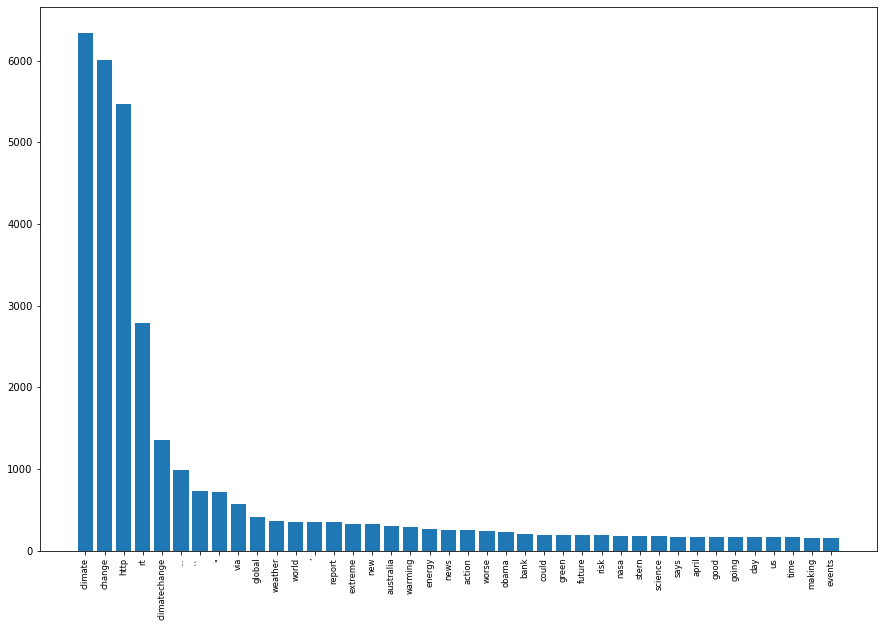

In [34]:
fig, ax0 = plt.subplots(figsize=(15,10))
ax0.bar(count_sort.index, count_sort['counts'])
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

As shown by the graph above, the word "climate" is shown more times than the rest of the words on the list, topping at 17,251 times shown. The word "change" is a close second, with "http" refering to a website prefix being the 3rd most frequent. However, the plot shows an exponential decay over the course of the whole dataset.

Now we will use a stemmer through nltk to analyze the words again, which will help to separate words from being catagorized into one word sometimes.

In [35]:
stemmer = nltk.stem.SnowballStemmer("english")
stems = []
for i in en_only['no_punct']:
    stems.append([stemmer.stem(word) for word in i])
    
en_only['stemmed'] = stems

In [36]:
freq2 = [FreqDist(x) for x in en_only['stemmed']]
en_only['freqs2'] = freq2
en_only['freqs2']

0       {'rt': 1, 'mariongrov': 1, 'abbott': 1, 'say':...
1       {'rt': 2, 'nswfarmer': 1, 'austfarminstitu': 1...
2       {'steve': 1, 'stockman': 1, 'hope': 1, 'jame':...
3       {'ted': 1, 'turner': 1, 'tell': 1, 'obama': 1,...
4       {'human': 1, 'race': 1, 'never': 1, 'fulli': 1...
                              ...                        
7146    {'rt': 1, 'sebhenbest': 1, 'climatecomm': 1, '...
7147    {'think': 1, 'hype': 1, 'might': 1, 'wan': 1, ...
7148    {'bhandari': 1, 'crise': 1, 'energi': 1, 'food...
7149    {'globalwarm': 1, 'acceler': 1, 'studi': 1, 's...
7150    {'american': 1, 'want': 1, 'renew': 1, 'energi...
Name: freqs2, Length: 7151, dtype: object

In [37]:
en_only['f2_counts'] = [Counter(x) for x in en_only['freqs2']]
en_only['f2_counts'][0]

Counter({'rt': 1,
         'mariongrov': 1,
         'abbott': 1,
         'say': 1,
         '10yr': 1,
         'ago': 1,
         'wore': 1,
         'speedo': 1,
         '289': 1,
         'day': 1,
         'year': 1,
         'chang': 2,
         'therefor': 1,
         'climat': 1,
         'http': 1,
         '//t.co/hvfjlwq8m4': 1})

In [38]:
wordcounts = Counter()
for i in en_only['f2_counts']:
    wordcounts += i

In [39]:
counts2 = pd.DataFrame.from_dict(dict(wordcounts), orient='index')
counts2

,0
rt,2791
mariongrov,3
abbott,150
say,290
10yr,1
...,...
predatori,1
gr,1
//t.co/gl4hqosilt,1
//t.co/q2gzjmxn7i,1


In [40]:
counts2 = counts2.rename(columns = {0: 'counts'})

In [41]:
count_sort2 = counts2.sort_values('counts', ascending = False)[:20]
count_sort2

,counts
climat,6380
chang,6175
http,5463
rt,2791
climatechang,1356
...,988
``,725
'',722
via,564
global,441


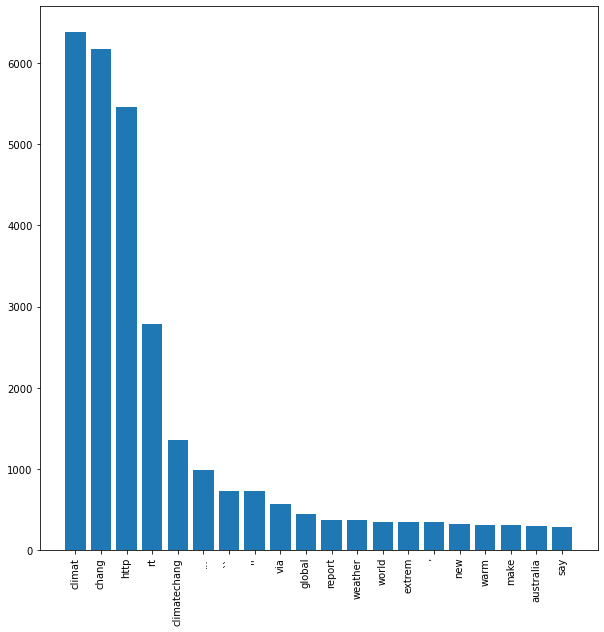

In [42]:
fig, ax1 = plt.subplots(figsize=(10,10))
ax1.bar(count_sort2.index, count_sort2['counts'])
plt.xticks(rotation=90, fontsize = 'medium')
plt.show()

Climate, change, and http are still the 3 most listed words of the bunch, but now the count is slightly different compared to the first histogram.

### 4. The VADER sentiment
Now we will use the VADER sentiment to split the data by separating the dates the comments were posted prior to April 4 and after April 4.

We will need to import SentimentIntensityAnalyzer from vaderSentiment in order to get this program to work

In [43]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [44]:
analyser = SentimentIntensityAnalyzer()
warnings.filterwarnings('ignore')

In [45]:
print(en_only['Full Text'][3])
print(analyser.polarity_scores(en_only['Full Text'][3]))

Ted Turner Tells Obama to Get 'Climate Change Under Control' http://t.co/hHGdcedpTL #mediabias
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [46]:
en_only['vader_scores'] = [analyser.polarity_scores(x) for x in en_only['Full Text']]
en_only['vader_scores'].head(20)

0     {'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'comp...
1     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2     {'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'comp...
3     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
5     {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp...
6     {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...
7     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
8     {'neg': 0.076, 'neu': 0.924, 'pos': 0.0, 'comp...
9     {'neg': 0.338, 'neu': 0.662, 'pos': 0.0, 'comp...
10    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
11    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
12    {'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'comp...
13    {'neg': 0.363, 'neu': 0.513, 'pos': 0.124, 'co...
14    {'neg': 0.221, 'neu': 0.779, 'pos': 0.0, 'comp...
15    {'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...
16    {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...
17    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'comp

In [47]:
en_only['vader_scores'][2]['pos']

0.319

In [48]:
en_only['pos'] = [x['pos'] for x in en_only['vader_scores']]
en_only['pos']

0       0.073
1       0.000
2       0.319
3       0.000
4       0.000
        ...  
7146    0.000
7147    0.000
7148    0.110
7149    0.000
7150    0.269
Name: pos, Length: 7151, dtype: float64

Plot the scores from the VADER analysis.

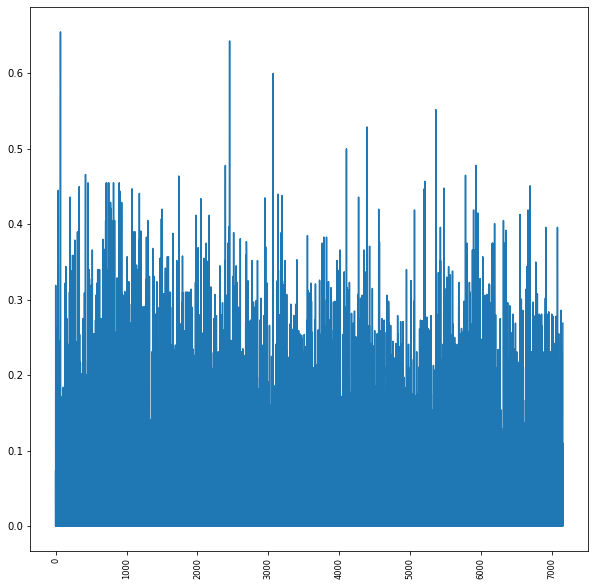

In [49]:
fig, ax0 = plt.subplots(figsize = (10,10))
ax0.plot(en_only['pos'])
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

In [50]:
type(en_only['Date'][0])

str

Import datetime to split the dataset before April 4, 2013 and after April 4, 2013.

In [51]:
from datetime import datetime as dt

In [52]:
en_only['Datetime'] = [dt.strptime(x, '%Y-%m-%d %H:%M:%S.%f') for x in en_only['Date']]
print(type(en_only['Datetime'][0]))
print(en_only['Datetime'][0])

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2013-04-04 23:59:06


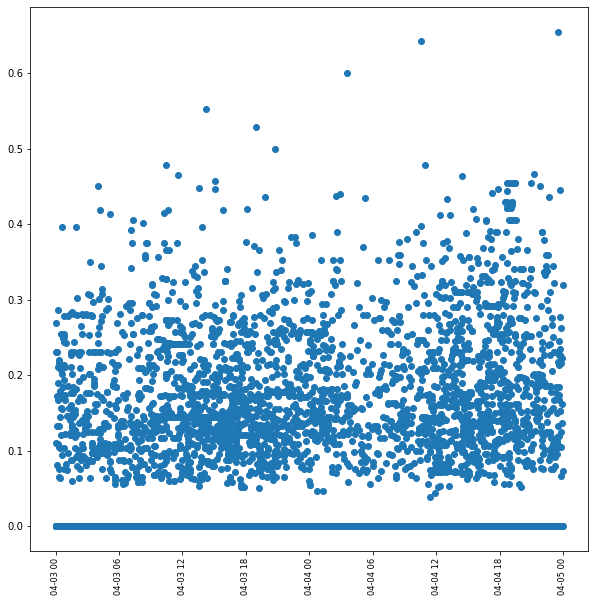

In [53]:
fig, ax1 = plt.subplots(figsize = (10,10))
ax1.scatter(en_only['Datetime'], en_only['pos'])
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

Create variables to analyze the tweets made before and after April 4, 2013.

In [54]:
pre_announce = en_only.loc[en_only['Datetime'] < '2013-04-04 00:00:00.0'].reset_index()
pre_announce

,index,Unnamed: 0,Date,Title,Url,Domain,Language,Author,Full Name,Full Text,...,filtered,no_punct,freqs1,f1_counts,stemmed,freqs2,f2_counts,vader_scores,pos,Datetime
0,3584,5168,2013-04-03 23:59:34.0,RT @onemarketmedia We're filming @robshirkey a...,http://twitter.com/csiTO/statuses/319600091142...,twitter.com,en,csiTO,csiTO (CSI Toronto),RT @onemarketmedia We're filming @robshirkey a...,...,"[rt, @, onemarketmedia, 're, filming, @, robsh...","[rt, onemarketmedia, 're, filming, robshirkey,...","{'rt': 1, 'onemarketmedia': 1, ''re': 1, 'film...","{'rt': 1, 'onemarketmedia': 1, ''re': 1, 'film...","[rt, onemarketmedia, re, film, robshirkey, com...","{'rt': 1, 'onemarketmedia': 1, 're': 1, 'film'...","{'rt': 1, 'onemarketmedia': 1, 're': 1, 'film'...","{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...",0.216,2013-04-03 23:59:34
1,3585,5172,2013-04-03 23:57:54.0,RT @johnmcquaid The scale of climate change is...,http://twitter.com/christackett/statuses/31959...,twitter.com,en,christackett,christackett (Chris Tackett),RT @johnmcquaid The scale of climate change is...,...,"[rt, @, johnmcquaid, scale, climate, change, c...","[rt, johnmcquaid, scale, climate, change, crea...","{'rt': 1, 'johnmcquaid': 1, 'scale': 1, 'clima...","{'rt': 1, 'johnmcquaid': 1, 'scale': 1, 'clima...","[rt, johnmcquaid, scale, climat, chang, creati...","{'rt': 1, 'johnmcquaid': 1, 'scale': 1, 'clima...","{'rt': 1, 'johnmcquaid': 1, 'scale': 1, 'clima...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2013-04-03 23:57:54
2,3586,5174,2013-04-03 23:57:24.0,@msnbc 37% believe #ClimateChange is a hoax .....,http://twitter.com/Angelete71/statuses/3195995...,twitter.com,en,Angelete71,Angelete71 (Sociologist4Equality),@msnbc 37% believe #ClimateChange is a hoax .....,...,"[@, msnbc, 37, %, believe, #, climatechange, h...","[msnbc, 37, believe, climatechange, hoax, ...,...","{'msnbc': 1, '37': 1, 'believe': 1, 'climatech...","{'msnbc': 1, '37': 1, 'believe': 1, 'climatech...","[msnbc, 37, believ, climatechang, hoax, ..., e...","{'msnbc': 1, '37': 1, 'believ': 1, 'climatecha...","{'msnbc': 1, '37': 1, 'believ': 1, 'climatecha...","{'neg': 0.186, 'neu': 0.754, 'pos': 0.06, 'com...",0.060,2013-04-03 23:57:24
3,3587,5175,2013-04-03 23:57:24.0,WJCT NEWS | Why Everglades Restoration Really ...,http://twitter.com/AllEverglades/statuses/3195...,twitter.com,en,AllEverglades,AllEverglades (GMD),WJCT NEWS | Why Everglades Restoration Really ...,...,"[wjct, news, |, everglades, restoration, reall...","[wjct, news, everglades, restoration, really, ...","{'wjct': 1, 'news': 1, 'everglades': 1, 'resto...","{'wjct': 1, 'news': 1, 'everglades': 1, 'resto...","[wjct, news, everglad, restor, realli, need, a...","{'wjct': 1, 'news': 1, 'everglad': 1, 'restor'...","{'wjct': 1, 'news': 1, 'everglad': 1, 'restor'...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2013-04-03 23:57:24
4,3588,5176,2013-04-03 23:56:24.0,RT @EPAwater It's Earth Month & we're hosting ...,http://twitter.com/ToniGranato/statuses/319599...,twitter.com,en,ToniGranato,ToniGranato (Toni Granato),RT @EPAwater It's Earth Month & we're hosting ...,...,"[rt, @, epawater, earth, month, &, 're, hostin...","[rt, epawater, earth, month, 're, hosting, twi...","{'rt': 1, 'epawater': 1, 'earth': 1, 'month': ...","{'rt': 1, 'epawater': 1, 'earth': 1, 'month': ...","[rt, epawat, earth, month, re, host, twitter, ...","{'rt': 1, 'epawat': 1, 'earth': 1, 'month': 1,...","{'rt': 1, 'epawat': 1, 'earth': 1, 'month': 1,...","{'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'comp...",0.075,2013-04-03 23:56:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3562,7146,10062,2013-04-03 00:01:46.0,RT @SebHenbest The @ClimateComm new report lin...,http://twitter.com/kmac/statuses/3192382570051...,twitter.com,en,kmac,kmac (Kate Mackenzie),RT @SebHenbest The @ClimateComm new report lin...,...,"[rt, @, sebhenbest, @, climatecomm, new, repor...","[rt, sebhenbest, climatecomm, new, report, lin..

In [55]:
post_announce = en_only.loc[en_only['Datetime'] > '2013-04-04 00:00:00.0'].reset_index()
post_announce

,index,Unnamed: 0,Date,Title,Url,Domain,Language,Author,Full Name,Full Text,...,filtered,no_punct,freqs1,f1_counts,stemmed,freqs2,f2_counts,vader_scores,pos,Datetime
0,0,0,2013-04-04 23:59:06.0,RT @MarionGroves Abbott says 10yrs ago he wore...,http://twitter.com/Qldaah/statuses/31996236101...,twitter.com,en,Qldaah,Qldaah (David Marler),RT @MarionGroves Abbott says 10yrs ago he wore...,...,"[rt, @, mariongroves, abbott, says, 10yrs, ago...","[rt, mariongroves, abbott, says, 10yrs, ago, w...","{'rt': 1, 'mariongroves': 1, 'abbott': 1, 'say...","{'rt': 1, 'mariongroves': 1, 'abbott': 1, 'say...","[rt, mariongrov, abbott, say, 10yr, ago, wore,...","{'rt': 1, 'mariongrov': 1, 'abbott': 1, 'say':...","{'rt': 1, 'mariongrov': 1, 'abbott': 1, 'say':...","{'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'comp...",0.073,2013-04-04 23:59:06
1,1,2,2013-04-04 23:58:04.0,RT @NSWFarmers RT @AustFarmInstitu: Two climat...,http://twitter.com/TheFacelessSpin/statuses/31...,twitter.com,en,TheFacelessSpin,TheFacelessSpin (FacelessFocusGroup),RT @NSWFarmers RT @AustFarmInstitu: Two climat...,...,"[rt, @, nswfarmers, rt, @, austfarminstitu, :,...","[rt, nswfarmers, rt, austfarminstitu, two, cli...","{'rt': 2, 'nswfarmers': 1, 'austfarminstitu': ...","{'rt': 2, 'nswfarmers': 1, 'austfarminstitu': ...","[rt, nswfarmer, rt, austfarminstitu, two, clim...","{'rt': 2, 'nswfarmer': 1, 'austfarminstitu': 1...","{'rt': 2, 'nswfarmer': 1, 'austfarminstitu': 1...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2013-04-04 23:58:04
2,2,3,2013-04-04 23:57:33.0,Steve Stockman Hopes James Hansen's NASA Retir...,http://twitter.com/iamgreenbean/statuses/31996...,twitter.com,en,iamgreenbean,iamgreenbean (Green Bean),Steve Stockman Hopes James Hansen's NASA Retir...,...,"[steve, stockman, hopes, james, hansen, nasa, ...","[steve, stockman, hopes, james, hansen, nasa, ...","{'steve': 1, 'stockman': 1, 'hopes': 1, 'james...","{'steve': 1, 'stockman': 1, 'hopes': 1, 'james...","[steve, stockman, hope, jame, hansen, nasa, re...","{'steve': 1, 'stockman': 1, 'hope': 1, 'jame':...","{'steve': 1, 'stockman': 1, 'hope': 1, 'jame':...","{'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'comp...",0.319,2013-04-04 23:57:33
3,3,4,2013-04-04 23:57:01.0,Ted Turner Tells Obama to Get 'Climate Change ...,http://twitter.com/cpwilldo/statuses/319961839...,twitter.com,en,cpwilldo,cpwilldo (chris price),Ted Turner Tells Obama to Get 'Climate Change ...,...,"[ted, turner, tells, obama, get, 'climate, cha...","[ted, turner, tells, obama, get, 'climate, cha...","{'ted': 1, 'turner': 1, 'tells': 1, 'obama': 1...","{'ted': 1, 'turner': 1, 'tells': 1, 'obama': 1...","[ted, turner, tell, obama, get, climat, chang,...","{'ted': 1, 'turner': 1, 'tell': 1, 'obama': 1,...","{'ted': 1, 'turner': 1, 'tell': 1, 'obama': 1,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2013-04-04 23:57:01
4,4,5,2013-04-04 23:56:52.0,The human race will never fully adapt to clima...,http://twitter.com/GreenSteve_com/statuses/319...,twitter.com,en,GreenSteve_com,GreenSteve_com (Green Steve),The human race will never fully adapt to clima...,...,"[human, race, never, fully, adapt, climate, ch...","[human, race, never, fully, adapt, climate, ch...","{'human': 1, 'race': 1, 'never': 1, 'fully': 1...","{'human': 1, 'race': 1, 'never': 1, 'fully': 1...","[human, race, never, fulli, adapt, climat, cha...","{'human': 1, 'race': 1, 'never': 1, 'fulli': 1...","{'human': 1, 'race': 1, 'never': 1, 'fulli': 1...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2013-04-04 23:56:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,3579,5056,2013-04-04 00:01:16.0,Liberal MP @DennisJensenMP takes aim at Tim Fl...,http://twitter.com/bazarazzi/statuses/31960051...,twitter.com,en,bazarazzi,bazarazzi (Shane Bazzi),Liberal MP @DennisJensenMP takes aim at Tim Fl...,...,"[liberal, mp, @, dennisjensenmp, takes, aim, t...","[liberal, mp, dennisjensenmp, takes, aim, tim,...","{'liberal

### 5. Import stats from scipy to perform a ttest

In [57]:
from scipy import stats

In [58]:
stats.describe(pre_announce['pos']).mean

0.073206335856462

In [59]:
stats.describe(post_announce['pos']).mean

0.07769112723214286

In [60]:
stats.ttest_ind(pre_announce['pos'], post_announce['pos'])

Ttest_indResult(statistic=-1.822335617456969, pvalue=0.06844583309584111)

In conclusion, more of the tweets were made after April 4, 2013. Overall though, the tweets seemed to have including a lot of links posted to news articles and other sites documenting the effects of climate change and how we were combatting it back in 2013.